In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv")
data.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [3]:
fft_data = data.loc[:, data.columns.str.match('^fft_|^label$')]
fft_data.head()



,fft_0_a,fft_1_a,fft_2_a,fft_3_a,fft_4_a,fft_5_a,fft_6_a,fft_7_a,fft_8_a,fft_9_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,-520.0,398.00,-201.0,-201.0,398.00,-52.2,121.00,-64.0,-64.0,121.00,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,66.2,-4.30,43.6,43.6,-4.30,66.0,-29.00,73.3,73.3,-29.00,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,-90.8,204.00,-77.1,-77.1,204.00,-488.0,415.00,-187.0,-187.0,415.00,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,119.0,6.25,10.9,10.9,6.25,-333.0,283.00,-144.0,-144.0,283.00,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,59.0,-2.37,10.8,10.8,-2.37,118.0,-1.81,26.7,26.7,-1.81,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])

y = data.pop('label')


In [5]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 500)
# fit() and transform()
X = data

#pca_model.fit(X)
#X = pca_model.transform(X)
# fit_transform()
#X = pca_model.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=48)
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# create data split for just fft data
x_fft = X
x_train_fft, x_test_fft, y_train_fft, y_test_fft = train_test_split(x_fft, y, train_size=0.7, random_state=48)
x_train_fft = np.array(x_train_fft).reshape((x_train_fft.shape[0],x_train_fft.shape[1],1))
y_train_fft = pd.get_dummies(y_train_fft)
y_test_fft = pd.get_dummies(y_test_fft)

(1492, 2548, 1)


LSTM Model and adding different layers

In [7]:
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [ ]:
inputs = tf.keras.Input(shape=(x_train_fft.shape[1], 1))
lstm1 = LSTM(128, return_sequences=True)(inputs)
lstm2 = LSTM(128)(lstm1)
dropout = Dropout(0.2)(lstm2)
batch_norm = BatchNormalization()(dropout)

outputs = Dense(3, activation='softmax')(batch_norm)
model1 = tf.keras.Model(inputs, outputs)
model1.summary()


In [ ]:
# compile the model using categorical cross entropy loss function
model1.compile(
    optimizer='adam', 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
)

# train the model for 10 epochs
history = model1.fit(
    x_train_fft, 
    y_train_fft, 
    epochs=20, 
    batch_size=32,
    validation_data=(x_test_fft, y_test_fft)
)

# evaluate the model on the test data
score = model1.evaluate(x_test_fft, y_test_fft, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot the loss curve for training
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=3.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [ ]:
inputs = tf.keras.Input(shape=(x_train_fft.shape[1], 1))
lstm1 = LSTM(128, return_sequences=True)(inputs)
lstm2 = LSTM(128)(lstm1)
dropout = Dropout(0.2)(lstm2)
#batch_norm = BatchNormalization()(dropout)

outputs = Dense(3, activation='softmax')(dropout)
model2 = tf.keras.Model(inputs, outputs)
model2.summary()

In [ ]:
# compile the model using categorical cross entropy loss function
model2.compile(
    optimizer='adam', 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
)

# train the model for 10 epochs
history = model2.fit(
    x_train_fft, 
    y_train_fft, 
    epochs=20, 
    batch_size=32,
    validation_data=(x_test_fft, y_test_fft)
)

# evaluate the model on the test data
score = model2.evaluate(x_test_fft, y_test_fft, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot the loss curve for training
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=3.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [21]:
inputs = tf.keras.Input(shape=(x_train_fft.shape[1], 1))
lstm1 = LSTM(128, return_sequences=True)(inputs)
global_pooling = tf.keras.layers.GlobalAveragePooling1D()(lstm1)
dropout = Dropout(0.2)(global_pooling)
batch_norm = BatchNormalization()(dropout)
outputs = Dense(3, activation='softmax')(batch_norm)

model3 = tf.keras.Model(inputs, outputs)
model3.summary()



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 500, 128)          66560     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 3)                 387 

Epoch 1/50
47/47 [==============================] - 5s 44ms/step - loss: 0.6270 - accuracy: 0.7125 - val_loss: 0.5531 - val_accuracy: 0.7703
Epoch 2/50
47/47 [==============================] - 1s 27ms/step - loss: 0.5982 - accuracy: 0.7386 - val_loss: 0.5866 - val_accuracy: 0.7859
Epoch 3/50
47/47 [==============================] - 1s 27ms/step - loss: 0.5999 - accuracy: 0.7339 - val_loss: 0.8456 - val_accuracy: 0.6359
Epoch 4/50
47/47 [==============================] - 1s 27ms/step - loss: 0.5983 - accuracy: 0.7379 - val_loss: 0.7823 - val_accuracy: 0.6750
Epoch 5/50
47/47 [==============================] - 1s 26ms/step - loss: 0.5676 - accuracy: 0.7607 - val_loss: 0.6078 - val_accuracy: 0.7359
Epoch 6/50
47/47 [==============================] - 1s 26ms/step - loss: 0.5905 - accuracy: 0.7453 - val_loss: 0.6248 - val_accuracy: 0.7219
Epoch 7/50
47/47 [==============================] - 1s 26ms/step - loss: 0.5775 - accuracy: 0.7527 - val_loss: 0.6670 - val_accuracy: 0.6828
Epoch 8/50
47

Text(0.5, 1.0, 'Loss Curves')

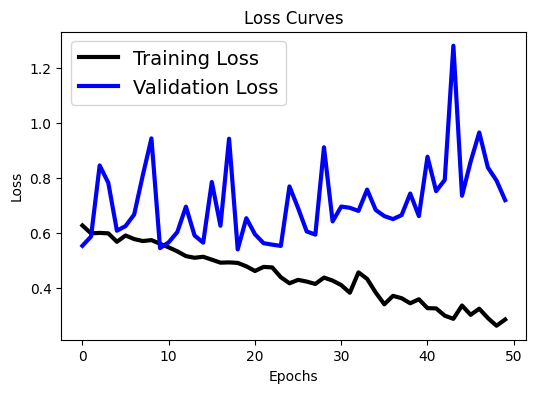

In [25]:
model3.compile(
    optimizer='adam', 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
)

# train the model for 10 epochs
history = model3.fit(
    x_train_fft, 
    y_train_fft, 
    epochs=50, 
    batch_size=32,
    validation_data=(x_test_fft, y_test_fft)
)

# evaluate the model on the test data
score = model3.evaluate(x_test_fft, y_test_fft, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot the loss curve for training
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=3.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [23]:
inputs = tf.keras.Input(shape=(x_train_fft.shape[1], 1))
lstm1 = LSTM(128, return_sequences=True)(inputs)
conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(lstm1)
global_pooling = tf.keras.layers.GlobalAveragePooling1D()(conv1d)
dropout = Dropout(0.2)(global_pooling)
batch_norm = BatchNormalization()(dropout)
outputs = Dense(3, activation='softmax')(batch_norm)

model4 = tf.keras.Model(inputs, outputs)
model4.summary()



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 lstm_6 (LSTM)               (None, 500, 128)          66560     
                                                                 
 conv1d (Conv1D)             (None, 498, 64)           24640     
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                           

Epoch 1/50
47/47 [==============================] - 5s 41ms/step - loss: 0.5886 - accuracy: 0.7379 - val_loss: 0.5558 - val_accuracy: 0.8125
Epoch 2/50
47/47 [==============================] - 1s 27ms/step - loss: 0.5793 - accuracy: 0.7339 - val_loss: 1.5545 - val_accuracy: 0.4203
Epoch 3/50
47/47 [==============================] - 1s 29ms/step - loss: 0.6007 - accuracy: 0.7393 - val_loss: 0.8550 - val_accuracy: 0.5156
Epoch 4/50
47/47 [==============================] - 1s 26ms/step - loss: 0.5786 - accuracy: 0.7393 - val_loss: 1.3818 - val_accuracy: 0.5609
Epoch 5/50
47/47 [==============================] - 1s 26ms/step - loss: 0.5595 - accuracy: 0.7500 - val_loss: 0.6851 - val_accuracy: 0.7578
Epoch 6/50
47/47 [==============================] - 1s 29ms/step - loss: 0.5648 - accuracy: 0.7446 - val_loss: 0.8801 - val_accuracy: 0.5484
Epoch 7/50
47/47 [==============================] - 1s 27ms/step - loss: 0.6075 - accuracy: 0.7332 - val_loss: 0.7367 - val_accuracy: 0.7188
Epoch 8/50
47

Text(0.5, 1.0, 'Loss Curves')

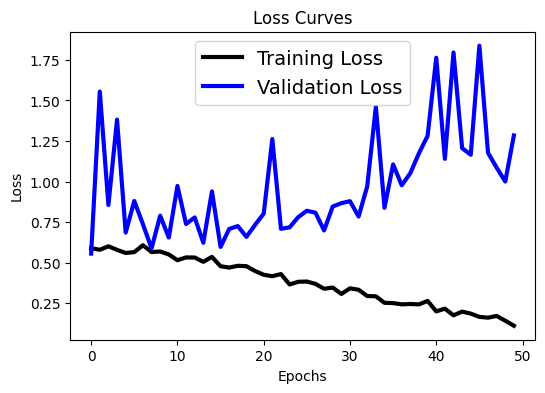

In [26]:
model4.compile(
    optimizer='adam', 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
)

# train the model for 10 epochs
history = model4.fit(
    x_train_fft, 
    y_train_fft, 
    epochs=50, 
    batch_size=32,
    validation_data=(x_test_fft, y_test_fft)
)


# evaluate the model on the test data
score = model4.evaluate(x_test_fft, y_test_fft, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot the loss curve for training
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=3.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [8]:
from sklearn.model_selection import GridSearchCV

# Define the LSTM units to search
lstm_units = [16, 32, 64, 128, 256]

# Define the parameter grid for the grid search
param_grid = {'lstm_units': lstm_units}

# Define a function to create and compile the model
def create_model(lstm_units):
    inputs = tf.keras.Input(shape=(x_train_fft.shape[1], 1))
    lstm1 = LSTM(lstm_units, return_sequences=True)(inputs)
    conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(lstm1)
    global_pooling = tf.keras.layers.GlobalAveragePooling1D()(conv1d)
    dropout = Dropout(0.2)(global_pooling)
    batch_norm = BatchNormalization()(dropout)
    outputs = Dense(3, activation='softmax')(batch_norm)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using KerasClassifier
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(x_train_fft, y_train)

# Get the best parameters and best score
best_params = grid_result.best_params_
best_score = grid_result.best_score_

print(best_params)
# Create the final model with the best parameters
final_model = create_model(best_params['lstm_units'])
final_model.summary()


/tmp/ipykernel_32/1548463584.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)


{'lstm_units': 64}
Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 2548, 1)]         0         
                                                                 
 lstm_16 (LSTM)              (None, 2548, 64)          16896     
                                                                 
 conv1d_16 (Conv1D)          (None, 2546, 64)          12352     
                                                                 
 global_average_pooling1d_16  (None, 64)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_16 (Bat  (None, 64)               256       
 chNormalization)                      

Epoch 1/50
47/47 [==============================] - 9s 113ms/step - loss: 0.4863 - accuracy: 0.8009 - val_loss: 0.7437 - val_accuracy: 0.9109
Epoch 2/50
47/47 [==============================] - 4s 85ms/step - loss: 0.2933 - accuracy: 0.8767 - val_loss: 0.6266 - val_accuracy: 0.9219
Epoch 3/50
47/47 [==============================] - 4s 88ms/step - loss: 0.2609 - accuracy: 0.8908 - val_loss: 0.5226 - val_accuracy: 0.9000
Epoch 4/50
47/47 [==============================] - 4s 87ms/step - loss: 0.2292 - accuracy: 0.9015 - val_loss: 0.4731 - val_accuracy: 0.9375
Epoch 5/50
47/47 [==============================] - 4s 88ms/step - loss: 0.1994 - accuracy: 0.9135 - val_loss: 0.3828 - val_accuracy: 0.9375
Epoch 6/50
47/47 [==============================] - 4s 87ms/step - loss: 0.1532 - accuracy: 0.9464 - val_loss: 0.2727 - val_accuracy: 0.9547
Epoch 7/50
47/47 [==============================] - 4s 87ms/step - loss: 0.1349 - accuracy: 0.9457 - val_loss: 0.3082 - val_accuracy: 0.9219
Epoch 8/50
4

Text(0.5, 1.0, 'Loss Curves')

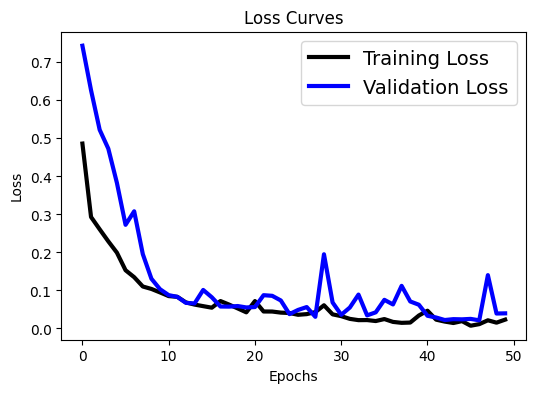

In [9]:
final_model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=['accuracy']
)

# train the model for 10 epochs
history = final_model.fit(
    x_train_fft, 
    y_train_fft, 
    epochs=50, 
    batch_size=32,
    validation_data=(x_test_fft, y_test_fft)
)


# evaluate the model on the test data
score = final_model.evaluate(x_test_fft, y_test_fft, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# plot the loss curve for training
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=3.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(x_test_fft, y_test)

# Predict the test set labels
y_pred = final_model.predict(x_test_fft)
print(y_pred)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)
print(y_test_fft)
# Compute F1 score and confusion matrix
#f1 = f1_score(y_test_fft, y_pred_classes, average='macro')
cm = confusion_matrix(y_test, y_pred_classes)

# Print the metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
#print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)



20/20 [==============================] - 1s 52ms/step
[[6.1529986e-09 1.0000000e+00 3.2668215e-10]
 [9.9997973e-01 2.0060324e-06 1.8252467e-05]
 [9.9999011e-01 1.3131702e-06 8.5934762e-06]
 ...
 [3.3043568e-07 9.9999964e-01 4.5835407e-08]
 [9.4030952e-08 9.9999988e-01 3.0175926e-08]
 [3.7110144e-09 1.0000000e+00 3.3768361e-09]]
[1 0 0 0 1 2 0 0 0 0 2 0 2 1 2 1 2 0 0 0 2 0 1 1 0 1 0 2 2 1 2 0 1 1 1 0 1
 1 1 2 0 1 2 1 1 1 1 2 0 1 2 1 2 2 1 0 0 0 1 1 0 0 2 2 2 0 0 1 1 1 1 0 0 1
 0 0 2 2 1 0 0 2 1 0 2 2 0 1 0 0 0 1 1 2 1 1 1 0 2 0 0 0 2 0 1 2 0 2 0 1 0
 2 2 1 1 1 2 2 1 1 2 2 2 0 0 1 0 0 1 2 2 1 1 2 1 2 0 2 2 0 2 1 2 2 0 1 2 1
 2 2 1 0 0 1 1 2 0 0 0 0 0 0 1 1 0 0 1 2 0 0 1 1 1 1 2 2 0 1 0 1 0 0 0 1 1
 2 1 0 1 1 0 0 0 1 0 1 0 2 0 1 1 2 0 0 0 1 1 1 2 0 0 1 0 0 0 0 1 2 0 0 1 1
 2 1 0 2 1 2 2 0 1 0 0 2 2 0 2 1 2 2 0 2 1 0 0 1 2 2 2 2 2 1 1 1 0 2 2 2 0
 2 0 0 1 1 2 2 0 0 2 2 2 1 2 0 2 1 1 2 2 0 1 1 2 0 1 2 0 1 1 2 0 1 0 2 0 1
 2 1 0 1 0 2 1 2 1 1 1 2 1 2 1 2 2 2 0 2 0 0 1 1 0 0 0 2 2 2 0 2 2 2 0

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets